In [199]:
import numpy as np
import pandas as pd
import seaborn as sns

In [200]:
data = pd.read_csv('data/melb_data.csv')
data = data.dropna(axis=0)
data = data.where(data.BuildingArea < 400).head(10)
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3.0,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2.0,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2.0,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0
11,Abbotsford,40 Nicholson St,3.0,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,2.0,2.0,214.0,190.0,2005.0,Yarra,-37.8085,144.9964,Northern Metropolitan,4019.0
12,Abbotsford,123/56 Nicholson St,2.0,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4019.0
15,Abbotsford,16 William St,2.0,h,1310000.0,S,Jellis,15/10/2016,2.5,3067.0,...,1.0,2.0,238.0,97.0,1890.0,Yarra,-37.8090,144.9976,Northern Metropolitan,4019.0
16,Abbotsford,42 Henry St,3.0,h,1200000.0,S,Jellis,16/07/2016,2.5,3067.0,...,2.0,1.0,113.0,110.0,1880.0,Yarra,-37.8056,144.9930,Northern Metropolitan,4019.0


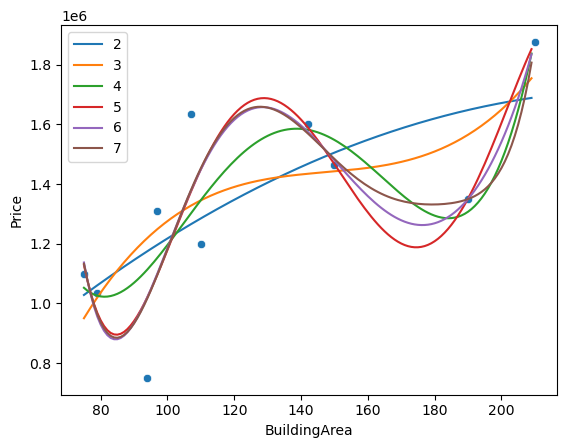

In [201]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline

degrees = [2, 3, 4, 5, 6, 7]

sns.scatterplot(x=data.BuildingArea, y=data.Price)
draw_area = np.arange(data.BuildingArea.min(), data.BuildingArea.max(), 1)

for deg in degrees:
    pipe = make_pipeline(
        PolynomialFeatures(degree=deg, include_bias=False),
        StandardScaler(),
        LinearRegression()
    )
    pipe.fit(data[['BuildingArea']].to_numpy(), data.Price.to_numpy())
    sns.lineplot(x=draw_area, y=pipe.predict(draw_area.reshape((-1, 1))), hue_norm=deg, label=deg)